In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ipywidgets import interact_manual

In [2]:
def isprime(x):
    if x < 2:
        return 0
    if x == 2:
        return 1
    else:
        for j in range(2, int(np.floor(np.sqrt(x))+1)):
            if isprime(j):
                if x % j == 0:
                    return 0
        return 1

In [3]:
def isprimeday(y, m, d):
    today = d + m*10**2 + y*10**(2+2)
    flag = 0
    L = 8
    while L >= 1:
        if not isprime(today):
            flag = 1
            # print("Today is NOT a prime day...")
            # break
            return 0
        L = L-1
        today = today % 10**L
        
    if flag == 0:
        # print("Today is a prime day!!!")
        return 1

In [4]:
interact_manual(isprimeday, y=(2001, 3000), m=(1, 12), d=(1, 31))

interactive(children=(IntSlider(value=2500, description='y', max=3000, min=2001), IntSlider(value=6, descripti…

<function __main__.isprimeday(y, m, d)>

In [5]:
import datetime as dt

startdate = dt.datetime(2001, 1, 1)
endate = dt.datetime(2100, 12, 31)

totaldays = (endate-startdate).days+1
primedays = []

for daynumber in range(totaldays):
    datestring = (startdate+dt.timedelta(days = daynumber)).date()
    spam = int(datestring.strftime("%Y"))
    egg = int(datestring.strftime("%m"))
    ham = int(datestring.strftime("%d"))
    if isprimeday(spam, egg , ham):
        primedays.append(datestring)

In [11]:
primedays

[datetime.date(2001, 2, 23),
 datetime.date(2001, 3, 13),
 datetime.date(2003, 12, 23),
 datetime.date(2006, 1, 7),
 datetime.date(2007, 8, 23),
 datetime.date(2010, 9, 7),
 datetime.date(2013, 2, 23),
 datetime.date(2019, 5, 23),
 datetime.date(2019, 8, 23),
 datetime.date(2030, 3, 17),
 datetime.date(2036, 3, 17),
 datetime.date(2040, 3, 7),
 datetime.date(2040, 8, 23),
 datetime.date(2048, 1, 7),
 datetime.date(2060, 3, 17),
 datetime.date(2066, 6, 17),
 datetime.date(2070, 1, 3),
 datetime.date(2070, 2, 23),
 datetime.date(2070, 3, 7),
 datetime.date(2070, 5, 23),
 datetime.date(2072, 10, 13),
 datetime.date(2091, 1, 3),
 datetime.date(2093, 1, 13),
 datetime.date(2100, 3, 13),
 datetime.date(2100, 9, 7)]

In [10]:
years = []
for datestring in primedays:
    years.append(int(datestring.strftime("%Y")))

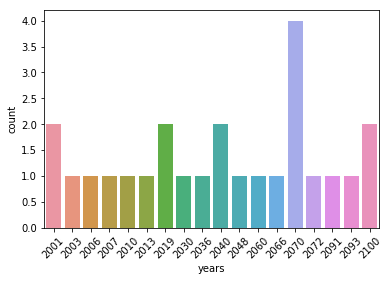

In [18]:
import seaborn as sns

years_df = pd.DataFrame({"years": years})

plt.xticks(rotation=45)

ax = sns.countplot(x='years', data=years_df)

In [20]:
dict = dict.fromkeys(range(2001, 2101), 0)

for key in years:
    dict[key] = dict[key] + 1

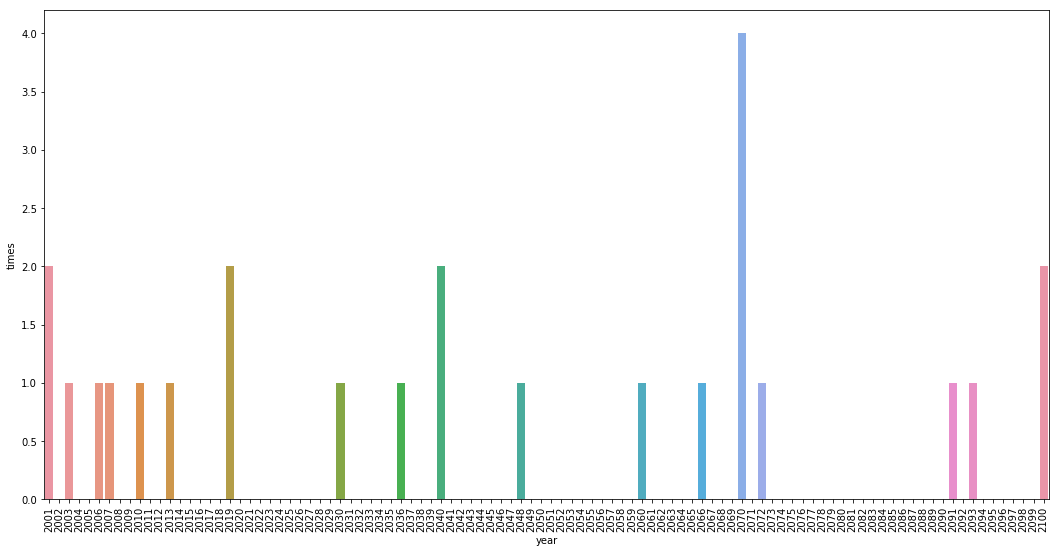

In [39]:
dict_df = pd.DataFrame({"times": dict})

plt.figure(figsize=(18,9))

plt.xticks(rotation=90)

plt.xlabel('year')

ax = sns.barplot(x=dict_df.index, y=dict_df.times)